# Bussiness Understanding

## Bussiness Objectives

### Specific

Identificar clientes em risco, para permitir a emprese a tomar ações direcionadas para cada tipo de cliente.

Prever quais clientes de uma empresa de telecomunicações estão mais propensos a cancelear seus serviços (Churn).

### Measurable 

Dado um cliente, queremos determinar seu potencial de cancelamento, classificando ao final como 

### Achievable 

Queremos não apenas definir se o cliente irá ou não cancelar, mas sua porcentagem de chance de cancelamento.

### Relevant

### Time-bound

## Assess the Situation

## Data Mining Goals

## Project Plan

# Data Understanding

## Collect the Initial Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Describe the Data

In [3]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

* ``customerID`` - ID do cliente
* ``gender`` - gênero do cliente (``male`` ou ``female``)
* ``SeniorCitizen`` - cliente idoso (``0`` ou ``1``)
* ``Partner`` - cliente tem parceiro (``Yes`` ou ``No``)
* ``Dependents`` - cliente tem dependentes (``Yes`` ou ``No``)
* ``tenure`` - meses que o cliente está com o serviço contratado 
* ``PhoneService`` - cliente tem serviço de telefone (``Yes`` ou ``No``)
* ``MultipleLines`` - tem multiplas linhas de telefone (``Yes``, ``No`` ou ``No phone service``)
* ``InternetService`` - tipo de serviço de internet (``DSL``, ``Fiber optic`` ou ``No``)
*  ``OnlineSecurity`` - tem serviço de segurança online (``Yes``, ``No`` ou ``No internet service``)
*  ``OnlineBackup`` - tem serviço de backup (__ ou __)
*  ``DeviceProtection`` -  tem serviço de proteção de dispositivo (__ ou __)
*  ``TechSupport`` - tem serviço de suporte técnico (__ ou __)  
*  ``StreamingTV`` - tem serviço de tv por assinatura (__ ou __)
*  ``StreamingMovies`` - tem serviço de filmes por assinatura (__ ou __)
*  ``Contract`` - tipo de contrato escolhido (__ ou __)    
*  ``PaperlessBilling`` - fatura sem uso de papel (__ ou __)
*  ``PaymentMethod`` - método de pagamento (__ ou __)   
*  ``MonthlyCharges`` - cargas mensais (__ ou __) 
*  ``TotalCharges`` - total de cargas (__ ou __)
*  ``Churn`` - serviço cancelado (__ ou __)      

In [7]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


``TotalCharges`` está dado como object, precisamos que esse dado seja um valor númerico ``float64``, pois ele representa uma quantidade

## Explore the Data

Vamos começar com a contagem de valores categóricos de forma individual

<Axes: xlabel='Churn', ylabel='count'>

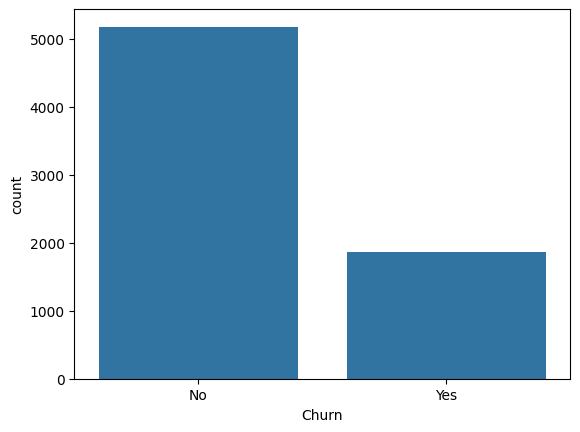

In [6]:
sns.countplot(x='Churn', data=df_churn)

## Verify Data Quality

In [9]:
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Preparation

## Select Data 

## Clean Data

## Construct Data 

## Integrate Data

## Format Data

# Modeling

## Select the Modeling Technique 

## Generate Test Design

## Build the Model 

## Assess the Model

# Evaluation

## Evaluate Results 

## Review Process 

## Determine Next Steps 

# Deployment

## Plan Deployment 

## Plan Monitoring and Maintenance

## Final Report